In [1]:
from tensorflow.keras.datasets.imdb import load_data
(x_data,y_data),(tt_x,tt_y) = load_data(num_words=500)
x_data.shape

(25000,)

In [2]:
x_data[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,


In [3]:
len(x_data[0]),len(x_data[1])

(218, 189)

In [4]:
y_data[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [5]:
from sklearn.model_selection import train_test_split
t_x,v_x,t_y,v_t = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [6]:
import numpy as np
l = np.array([len(i) for i in t_x])
l

array([259, 520, 290, ..., 300,  70,  77])

(array([1.1149e+04, 5.7490e+03, 1.8590e+03, 7.3200e+02, 3.0600e+02,
        1.8800e+02, 6.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([  11. ,  195.3,  379.6,  563.9,  748.2,  932.5, 1116.8, 1301.1,
        1485.4, 1669.7, 1854. ]),
 <BarContainer object of 10 artists>)

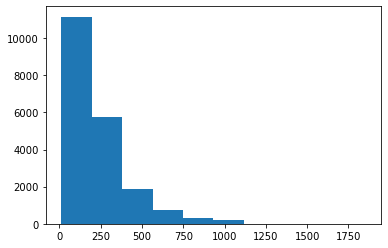

In [7]:
import matplotlib.pyplot as plt
plt.hist(l)

In [8]:
np.median(l)

178.0

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
s_t_x=pad_sequences(t_x,maxlen=100)

In [10]:
s_t_x.shape

(20000, 100)

In [11]:
s_v_x=pad_sequences(v_x,maxlen=100)

In [12]:
from tensorflow import keras
m = keras.Sequential()

In [13]:
m.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
m.add(keras.layers.Dense(1,activation='sigmoid'))

In [14]:
t_ho=keras.utils.to_categorical(s_t_x)

In [15]:
t_ho.shape

(20000, 100, 500)

In [16]:
v_ho=keras.utils.to_categorical(s_v_x)

In [17]:
v_ho.shape

(5000, 100, 500)

In [18]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [19]:
ot=keras.optimizers.RMSprop(learning_rate=1e-4)
m.compile(optimizer=ot,loss='binary_crossentropy',metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2.h5',save_best_only=True)
e_stopping = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
hy = m.fit(t_ho,t_y,epochs=100,batch_size=64,validation_data=(v_ho,v_t),callbacks=[ck_p,e_stopping])

Epoch 1/100
313/313 [==============================] - 16s 43ms/step - loss: 0.6970 - accuracy: 0.5066 - val_loss: 0.6926 - val_accuracy: 0.5208
Epoch 2/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6828 - accuracy: 0.5666 - val_loss: 0.6787 - val_accuracy: 0.5820
Epoch 3/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6695 - accuracy: 0.6121 - val_loss: 0.6668 - val_accuracy: 0.6228
Epoch 4/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6563 - accuracy: 0.6459 - val_loss: 0.6538 - val_accuracy: 0.6550
Epoch 5/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6428 - accuracy: 0.6718 - val_loss: 0.6416 - val_accuracy: 0.6728
Epoch 6/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6294 - accuracy: 0.6914 - val_loss: 0.6304 - val_accuracy: 0.6858
Epoch 7/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6158 - accuracy: 0.7066 - val_loss: 0.6159 - val_ac

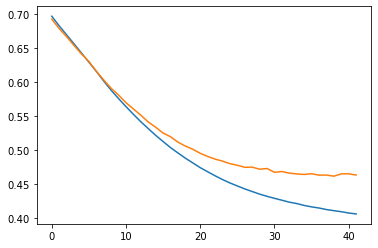

In [20]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

In [25]:
m1 = keras.Sequential()
m1.add(keras.layers.Embedding(500,16,input_length=100))
m1.add(keras.layers.SimpleRNN(8))
m1.add(keras.layers.Dense(1,activation='sigmoid'))
ot=keras.optimizers.RMSprop(learning_rate=1e-4)
m1.compile(optimizer=ot,loss='binary_crossentropy',metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2_emd.h5',save_best_only=True)
e_stopping = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
hy1 = m1.fit(s_t_x,t_y,epochs=100,batch_size=64,validation_data=(s_v_x,v_t),callbacks=[ck_p,e_stopping])

Epoch 1/100
313/313 [==============================] - 12s 33ms/step - loss: 0.6943 - accuracy: 0.5014 - val_loss: 0.6924 - val_accuracy: 0.5116
Epoch 2/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6907 - accuracy: 0.5272 - val_loss: 0.6907 - val_accuracy: 0.5308
Epoch 3/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6878 - accuracy: 0.5493 - val_loss: 0.6893 - val_accuracy: 0.5422
Epoch 4/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6848 - accuracy: 0.5656 - val_loss: 0.6881 - val_accuracy: 0.5478
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6814 - accuracy: 0.5737 - val_loss: 0.6869 - val_accuracy: 0.5480
Epoch 6/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6776 - accuracy: 0.5849 - val_loss: 0.6857 - val_accuracy: 0.5550
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6708 - accuracy: 0.6028 - val_loss: 0.6748 - val_accuracy

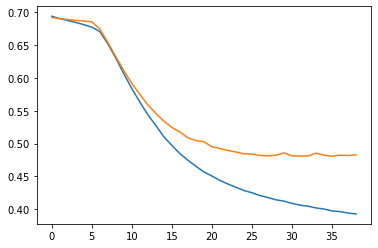

In [26]:
plt.plot(hy1.history['loss'])
plt.plot(hy1.history['val_loss'])

In [27]:
(x_data,y_data),(tt_x,tt_y) = load_data(num_words=500)
t_x,v_x,t_y,v_t = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [28]:
s_t_x=pad_sequences(t_x,maxlen=100)
s_v_x=pad_sequences(v_x,maxlen=100)

In [29]:
m2 = keras.Sequential()
m2.add(keras.layers.Embedding(500,16,input_length=100))
m2.add(keras.layers.LSTM(8,dropout=0.3))
m2.add(keras.layers.Dense(1,activation='sigmoid'))

In [30]:
ot=keras.optimizers.RMSprop(learning_rate=1e-4)
m2.compile(optimizer=ot,loss='binary_crossentropy',metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2_LSTM.h5',save_best_only=True)
e_stopping = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
hy2 = m2.fit(s_t_x,t_y,epochs=100,batch_size=64,validation_data=(s_v_x,v_t),callbacks=[ck_p,e_stopping])

Epoch 1/100
313/313 [==============================] - 16s 40ms/step - loss: 0.6930 - accuracy: 0.5145 - val_loss: 0.6924 - val_accuracy: 0.5588
Epoch 2/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6916 - accuracy: 0.5737 - val_loss: 0.6909 - val_accuracy: 0.6008
Epoch 3/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6895 - accuracy: 0.6111 - val_loss: 0.6882 - val_accuracy: 0.6272
Epoch 4/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6849 - accuracy: 0.6465 - val_loss: 0.6812 - val_accuracy: 0.6708
Epoch 5/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6665 - accuracy: 0.6988 - val_loss: 0.6427 - val_accuracy: 0.7010
Epoch 6/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6271 - accuracy: 0.6988 - val_loss: 0.6166 - val_accuracy: 0.7080
Epoch 7/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6086 - accuracy: 0.7136 - val_loss: 0.5980 - val_ac

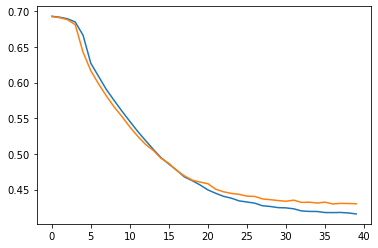

In [31]:
plt.plot(hy2.history['loss'])
plt.plot(hy2.history['val_loss'])

In [ ]:
m3 = keras.Sequential()
m3.add(keras.layers.Embedding(500,16,input_length=100))
m3.add(keras.layers.LSTM(8,dropout=0.3,return_sequences=Ture))
m3.add(keras.layers.LSTM(8,dropout=0.3))
m3.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
m4 = keras.Sequential()
m4.add(keras.layers.Embedding(500,16,input_length=100))
m4.add(keras.layers.GRU(8,dropout=0.3))
m4.add(keras.layers.Dense(1,activation='sigmoid'))